In [23]:
import pandas as pd
import numpy as np

#Date stuff
from datetime import datetime
from datetime import timedelta

#Library for Nice graphing
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
%matplotlib inline

#Library for statistics operation
import scipy.stats as stats

# Date Time library
from datetime import datetime

#Machine learning Library
import statsmodels.api as sm
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [24]:
#1. Preprocessing the data (15 points)
# a. Check a few observations and get familiar with the data. (1 points)

df = pd.read_csv("C:/Users/user/Downloads/data_credit_card.csv")

In [25]:
df.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [26]:
#b. Check the size and info of the data set. (2 points)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [12]:
df.shape

(8950, 18)

In [15]:
#c. Check for missing values. Impute the missing values if there is any. (2 points)
df.isnull().sum().values.sum()

314

In [19]:
#Since there are missing values in the data so we are imputing them with median
df.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [20]:
# CREDIT_LIMIT  and MINIMUM_PAYMENTS has missing values so we need to remove with median.

df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)

df['CREDIT_LIMIT'].count()


df['MINIMUM_PAYMENTS'].median()
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)

In [21]:
# Now again check the missing values.

df.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [22]:
df.isnull().sum().values.sum()

0

In [27]:
#d. Drop unnecessary columns. (2 points)
df = df.drop(columns=['CUST_ID','TENURE'])
df.sample(7)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
5083,1908.569743,1.000000,0.00,0.00,0.00,4604.425401,0.000000,0.000000,0.000000,0.416667,6,0,5400.0,2118.553043,471.692662,0.0
6804,255.851136,0.909091,311.80,0.00,311.80,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,2500.0,709.240603,2703.147477,0.0
7298,978.771066,1.000000,905.04,545.12,359.92,0.000000,0.666667,0.166667,0.666667,0.000000,0,20,4000.0,392.482391,315.469998,0.0
6615,1100.505764,1.000000,220.00,220.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,1200.0,344.856423,623.734943,0.0
6448,1906.104266,1.000000,781.43,1.00,780.43,2097.271687,0.583333,0.083333,0.500000,0.166667,2,16,3400.0,495.427538,618.280632,0.0
3727,22.682781,0.272727,161.50,161.50,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,2000.0,934.889414,81.670199,0.0
4298,5686.466725,0.909091,177.35,177.35,0.00,0.000000,0.090909,0.090909,0.000000,0.000000,0,1,8000.0,1775.784106,1724.337874,0.0


In [29]:
df.shape

(8950, 16)

In [105]:
df_copy = df.copy()

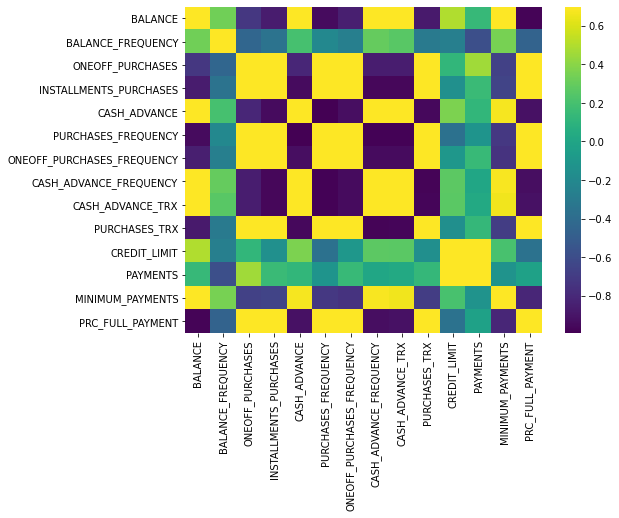

In [106]:
#e. Check correlation among features and comment your findings. (3 points)

# Heatmap of the Pearson correlation between each pair of features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='viridis', vmax=0.70) # I set vmax=0.7 to easily spot correlations greater than or close to 0.7
plt.show()

In [107]:
df=df.corr()
df

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
BALANCE,1.000000,0.335099,-0.726181,-0.862287,0.941527,-0.945418,-0.850457,0.932492,0.920952,-0.874188,0.499228,0.138918,0.802166,-0.978921
BALANCE_FREQUENCY,0.335099,1.000000,-0.438818,-0.351411,0.202022,-0.202384,-0.268279,0.296975,0.262492,-0.301519,-0.267117,-0.584523,0.354786,-0.462415
ONEOFF_PURCHASES,-0.726181,-0.438818,1.000000,0.902171,-0.810610,0.805806,0.935029,-0.858226,-0.854575,0.928079,0.120586,0.457917,-0.664277,0.764285
INSTALLMENTS_PURCHASES,-0.862287,-0.351411,0.902171,1.000000,-0.940737,0.944332,0.916728,-0.964624,-0.961658,0.985264,-0.151506,0.157587,-0.649809,0.868619
CASH_ADVANCE,0.941527,0.202022,-0.810610,-0.940737,1.000000,-0.993080,-0.927027,0.990961,0.992298,-0.957172,0.367235,0.123271,0.674680,-0.919872
PURCHASES_FREQUENCY,-0.945418,-0.202384,0.805806,0.944332,-0.993080,1.000000,0.929169,-0.986047,-0.985268,0.961090,-0.363987,-0.115330,-0.716023,0.919738
ONEOFF_PURCHASES_FREQUENCY,-0.850457,-0.268279,0.935029,0.916728,-0.927027,0.929169,1.000000,-0.940455,-0.940925,0.968660,-0.099005,0.144895,-0.747347,0.851715
CASH_ADVANCE_FREQUENCY,0.932492,0.296975,-0.858226,-0.964624,0.990961,-0.986047,-0.940455,1.000000,0.998920,-0.973684,0.270993,0.011635,0.684195,-0.933020
CASH_ADVANCE_TRX,0.920952,0.262492,-0.854575,-0.961658,0.992298,-0.985268,-0.940925,0.998920,1.000000,-0.972645,0.266687,0.027095,0.665121,-0.919589
PURCHASES_TRX,-0.874188,-0.301519,0.928079,0.985264,-0.957172,0.961090,0.968660,-0.973684,-0.972645,1.000000,-0.154189,0.136172,-0.693402,0.871372


In [108]:
# Function to get unique correlations from the correlation matrix
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top n absolute correlation values and corresponding columns
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [109]:
print("Top Absolute Correlations \n")
print(get_top_abs_correlations(df, 5))

Top Absolute Correlations 

CASH_ADVANCE_FREQUENCY      CASH_ADVANCE_TRX       0.999908
CASH_ADVANCE                PURCHASES_FREQUENCY    0.999898
INSTALLMENTS_PURCHASES      PURCHASES_TRX          0.999614
ONEOFF_PURCHASES_FREQUENCY  PURCHASES_TRX          0.999225
CASH_ADVANCE                CASH_ADVANCE_TRX       0.998851
dtype: float64


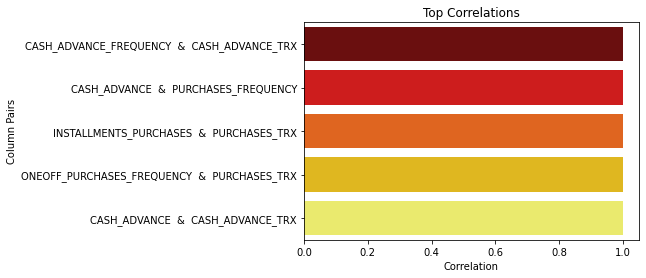

In [110]:
# Visualization of the top correlated variables
x = get_top_abs_correlations(df, 5)
x = x.reset_index()
x.columns = ['Column_1', 'Column_2', 'Correlation' ]
x['Column Pairs'] = x['Column_1'] + '  &  ' + x['Column_2']
sns.barplot(x='Correlation', y='Column Pairs', data=x, palette='hot')
plt.title('Top Correlations')
plt.show()


#Very high correlation between PURCHASES and ONEOFF_PURCHASES

ValueError: Could not interpret input 'PURCHASES'

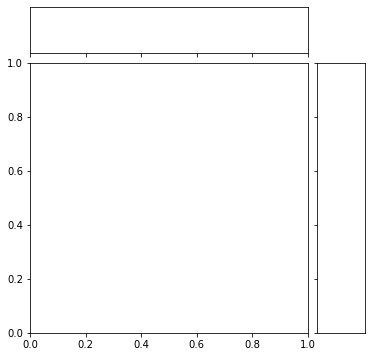

In [111]:
# Jointplot to visualize the high correlation between PURCHASES and ONEOFF_PURCHASES
sns.jointplot(x='PURCHASES', y='ONEOFF_PURCHASES', data=df, color='lightgreen')
plt.show()

In [101]:
df[['PURCHASES', 'ONEOFF_PURCHASES']].head(5)

KeyError: "['PURCHASES'] not in index"

In [102]:
df[['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']].head(5)

KeyError: "['PURCHASES'] not in index"

In [103]:
df.drop('PURCHASES', axis=1, inplace=True)

KeyError: "['PURCHASES'] not found in axis"

In [104]:
# KDE plot to visualize high correlation between PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY
sns.kdeplot( df['PURCHASES_FREQUENCY'], df['PURCHASES_INSTALLMENTS_FREQUENCY'],
                 cmap="plasma", shade=True, shade_lowest=False)
plt.show()

KeyError: 'PURCHASES_INSTALLMENTS_FREQUENCY'

In [51]:
# Dropping PURCHASES_INSTALLMENTS_FREQUENCY
df.drop('PURCHASES_INSTALLMENTS_FREQUENCY', axis=1, inplace=True)

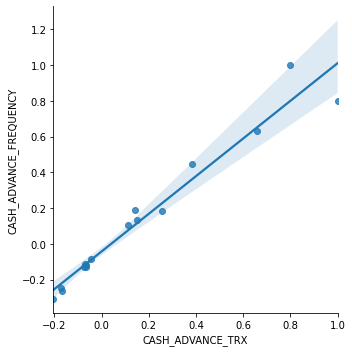

In [52]:

# Plot to visualize linear relationship between CASH_ADVANCE_TRX and CASH_ADVANCE_FREQUENCY
sns.lmplot(x='CASH_ADVANCE_TRX', y='CASH_ADVANCE_FREQUENCY', data=df)

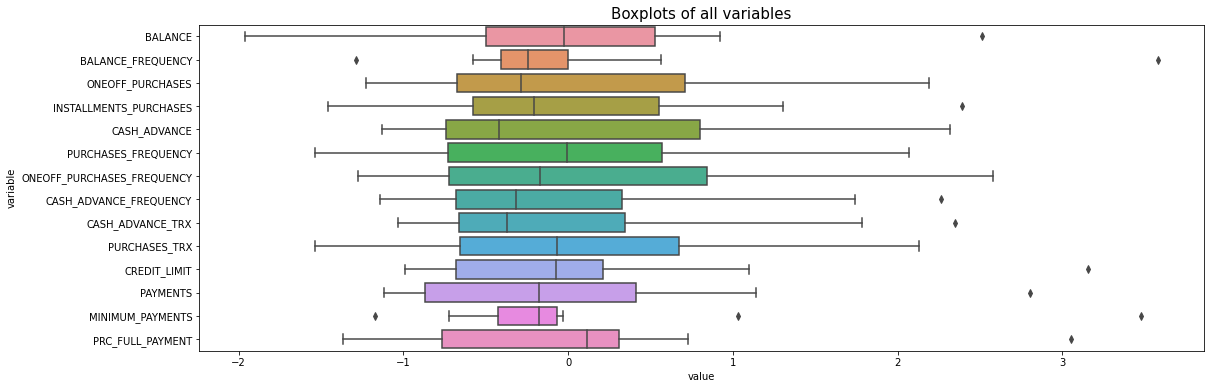

In [67]:

# Plotting Boxplots of all our features to get idea of distribution and outliers
plt.figure(figsize=(18,6))
sns.boxplot(x="value", y="variable", data=pd.melt(df))
plt.title('Boxplots of all variables', size=15)
plt.show()

In [54]:
#f. Check distribution of features and comment your findings. (3 points)
df.describe()

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.259350,0.194954,0.305629,0.296486,0.182880,0.249542,0.256535,0.130555,0.164705,0.342646,0.281301,0.331218,0.150818,0.088556
std,0.304405,0.232237,0.327324,0.303952,0.364048,0.374488,0.297568,0.396414,0.367425,0.318873,0.235267,0.246620,0.252130,0.308177
min,-0.318959,-0.095082,-0.082628,-0.132318,-0.215507,-0.308478,-0.111716,-0.308478,-0.203478,-0.131168,0.055672,0.065008,-0.135579,-0.318959
25%,0.113143,0.103089,0.091052,0.125925,-0.078576,-0.014817,0.048507,-0.131456,-0.070316,0.140579,0.126104,0.123999,0.046271,-0.139918
50%,0.251837,0.139847,0.214643,0.235271,0.034031,0.247326,0.208229,0.010223,0.033215,0.321857,0.264691,0.289040,0.107858,0.122451
75%,0.414208,0.194508,0.530049,0.459651,0.464101,0.457149,0.499158,0.256209,0.287746,0.551250,0.329034,0.429705,0.135024,0.180927
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
#g. Standardize the data using appropriate methods. (2 points)
from sklearn.preprocessing import StandardScaler

In [69]:
# Scaling the data
# Scaling the data
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.fit_transform(df), columns= df.columns, index=df.index)
df.head()

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
BALANCE,2.512906,0.566830,-0.445776,-0.577698,0.890275,-0.903167,-0.636435,0.830229,0.619654,-0.609909,1.097393,-0.035247,1.031117,-1.365709
BALANCE_FREQUENCY,0.213962,3.580177,-0.635176,-0.585095,-0.236865,-0.054678,-0.187839,0.159755,-0.065073,-0.495616,-0.814141,-1.114837,-0.051938,-0.615429
PURCHASES,-0.264943,-0.272520,1.928551,1.302786,-0.664857,0.395690,0.839563,-0.653155,-0.651792,1.123621,0.332147,1.139273,-0.222347,0.307728
ONEOFF_PURCHASES,-0.322319,-0.403049,2.190930,0.115989,-0.607696,0.042459,0.931405,-0.555414,-0.592867,0.657098,0.168670,0.988629,-0.407908,0.148151
INSTALLMENTS_PURCHASES,-0.450842,-0.314244,0.078857,2.390462,-0.701083,0.531930,-0.147484,-0.684876,-0.670974,0.924580,-0.108878,0.221390,-0.068949,0.315068


In [70]:

# Replacing extreme outliers with 99th and 1st percentiles for each variable
df_kmeans = df.copy()
for i in df_kmeans.columns:
    ulimit = np.percentile(df_kmeans[i].values, 99)
    llimit = np.percentile(df_kmeans[i].values, 1)
    df_kmeans[i].loc[df_kmeans[i]>ulimit] = ulimit
    df_kmeans[i].loc[df_kmeans[i]<llimit] = llimit

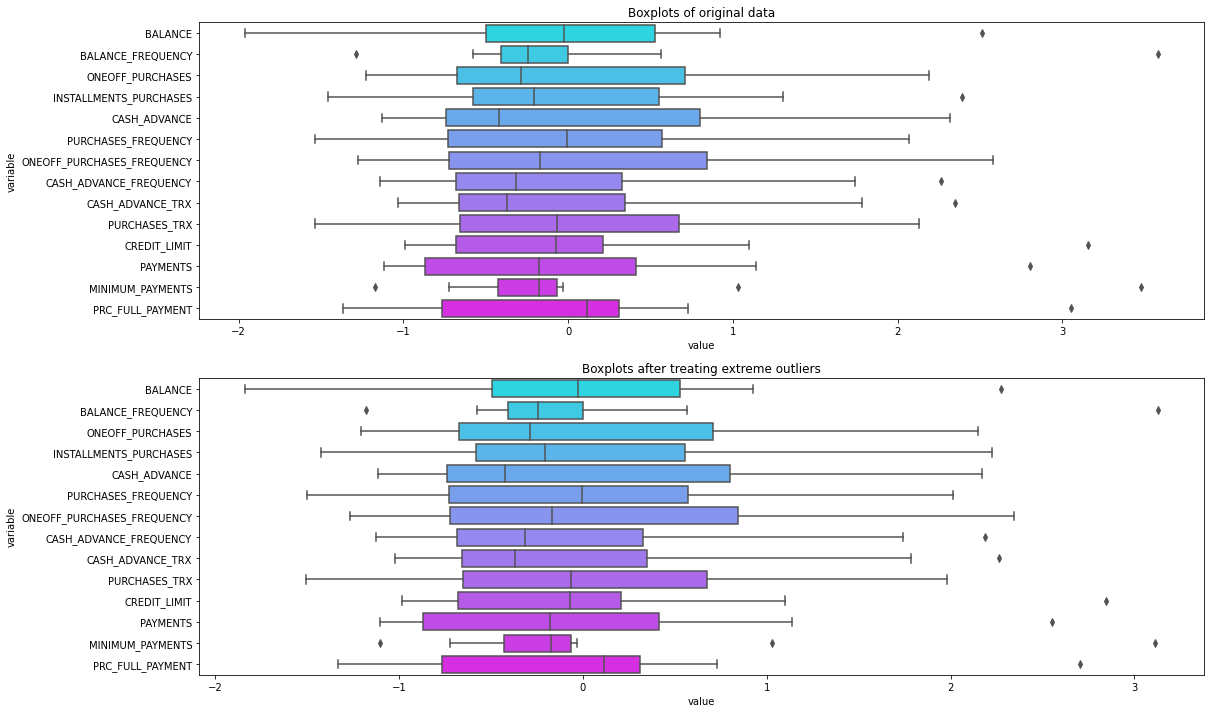

In [71]:
# Comparison of Boxplots before and after treating outliers
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18,12) )
sns.boxplot(x="value", y="variable", data=pd.melt(df), ax=ax[0], palette='cool')
ax[0].title.set_text('Boxplots of original data')

sns.boxplot(x="value", y="variable", data=pd.melt(df_kmeans), ax=ax[1], palette='cool')
ax[1].title.set_text('Boxplots after treating extreme outliers')
plt.show()

In [91]:
#3. Apply PCA to the dataset and perform all steps from Q2 on the new features generated using PCA. (15
#points)
from sklearn.decomposition import PCA

In [92]:
scaler = StandardScaler()
scaler.fit(df_copy)
scaled_df = pd.DataFrame(scaler.fit_transform(df_copy), columns= df_copy.columns, index=df_copy.index)
scaled_df.head()

NameError: name 'df_copy' is not defined

In [84]:
#2. Build a k-means algorithm for clustering credit card data. Kindly follow the below steps and answer the
#following. (10 points)
#a. Build k means model on various k values and plot the inertia against various k values.

# Imports for kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [ ]:
# k-means with 10 different centroid seeds
# (init= 'k-means++' : selects initial cluster centers in a smart way to speed up convergence)

In [85]:
# and Silhouette scores for different values of k (number of clusters).

def kmeans_analysis(df_kmeans, random_state=101):
    
    range_n_clusters = list(range(2,11))
    silhouette_scores = []
    wss = []
    
    # Taking 2 Principal Components for the dataset for purpose of visualization
    pca = PCA().fit(df_kmeans)
    X = pca.fit_transform(df_kmeans)
    
    # Looping through the values of k
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state= random_state)
        cluster_labels = clusterer.fit_predict(df_kmeans)

        # The silhouette_score gives the average value for all the samples.
        silhouette_avg = silhouette_score(df_kmeans, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", round(silhouette_avg,2))
        
        # Appending silhouette score and within cluster squared error to seperate lists for the particular k value
        silhouette_scores.append(silhouette_avg)
        wss.append(clusterer.inertia_)
        
        # Silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(df_kmeans, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        ax2.set_title("Visualization of the clustered data on 1st and 2nd PC")
        ax2.set_xlabel("Feature space for PC_1")
        ax2.set_ylabel("Feature space for PC_2")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()
    return silhouette_scores, wss

In [86]:
# Function to plot WSS and Silhouette scores vs No. of clusters
def make_plots(wss, silhouette_scores):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
    
    ax1.plot(range(2, 11), wss, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
    ax1.set_title('Elbow method- WSS vs k', size=13)
    ax1.set_xlabel('Number of clusters (k)')
    ax1.set_ylabel('Within Cluster Sum of Squares (WSS)') #within cluster sum of squares
    
    ax2.plot(range(2, 11), silhouette_scores, color='red', linestyle='dashed', marker='o', markerfacecolor='black', markersize=8)
    ax2.set_title('Silhouette Scores vs k', size=13)
    ax2.set_xlabel('Number of clusters (k)')
    ax2.set_ylabel('Silhouette Coefficient')
    
    plt.suptitle(('Choosing k value for kmeans'),
             fontsize=14, fontweight='bold')
    plt.show()

In [87]:
#b. Evaluate the model using Silhouette coefficient
silhouette_scores, wss = kmeans_analysis(df_kmeans)

NameError: name 'PCA' is not defined

In [90]:
#c. Plot an elbow plot to find the optimal value of k
make_plots(wss, silhouette_scores)

NameError: name 'wss' is not defined

In [89]:
#d. Which k value gives the best result?


In [ ]:
#3. Apply PCA to the dataset and perform all steps from Q2 on the new features generated using PCA. (15
#points)
from sklearn.decomposition import PCA


In [ ]:
cr_dummy.shape

In [ ]:

#We have 17 features so our n_component will be 17.
pc=PCA(n_components=17)
cr_pca=pc.fit(cr_scaled)

In [ ]:
#Lets check if we will take 17 component then how much varience it explain. Ideally it should be 1 i.e 100%
sum(cr_pca.explained_variance_ratio_)

In [ ]:

var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [ ]:

var_ratio

In [ ]:
#Since 6 components are explaining about 90% variance so we select 5 components

pc=PCA(n_components=6)


In [ ]:
p=pc.fit(cr_scaled)

In [ ]:
cr_scaled.shape

In [ ]:
p.explained_variance_

In [ ]:
np.sum(p.explained_variance_)

In [ ]:
np.sum(p.explained_variance_)

In [ ]:
var_ratio

In [ ]:
pd.Series(var_ratio).plot()

In [ ]:
#Since 5 components are explaining about 87% variance so we select 5 components
cr_scaled.shape

In [ ]:
pc_final=PCA(n_components=6).fit(cr_scaled)

reduced_cr=pc_final.fit_transform(cr_scaled)

In [ ]:

dd=pd.DataFrame(reduced_cr)

In [ ]:
dd.head()

In [ ]:
#So initially we had 17 variables now its 5 so our variable go reduced
dd.shape

In [ ]:
col_list=cr_dummy.columns

In [ ]:
col_list

In [ ]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(6)],index=col_list)

In [ ]:
#So above data gave us eigen vector for each component we had all eigen vector value very small we can remove those variable bur in our case its not

# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)])

In [ ]:
#4. Create a new column as a cluster label in the original data frame and perform cluster analysis. Check the
#correlation of cluster labels with various features and mention your inferences. (Hint - Does cluster 1
#have a high credit limit?) (5 points)


#Based on the intuition on type of purchases made by customers and their distinctive behavior exhibited based on the purchase_type (as visualized above in Insights from KPI) , I am starting with 4 clusters.
from sklearn.cluster import KMeans

In [ ]:
km_4=KMeans(n_clusters=4,random_state=123)

In [ ]:
km_4.fit(reduced_cr)

In [ ]:
km_4.labels_

In [ ]:
pd.Series(km_4.labels_).value_counts()
#Here we donot have known k value so we will find the K. To do that we need to take a cluster range between 1 and 21.

In [ ]:
#Identify cluster Error


cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( reduced_cr )
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here.

In [ ]:

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

In [ ]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
#5. Comment your findings and inferences and compare the performance. Does applying PCA give a better
#result in comparison to earlier? (5 points)

from sklearn.decomposition import PCA

In [ ]:
cr_dummy.shape

In [ ]:
#We have 17 features so our n_component will be 17.
pc=PCA(n_components=17)
cr_pca=pc.fit(cr_scaled)

In [ ]:
#Lets check if we will take 17 component then how much varience it explain. Ideally it should be 1 i.e 100%
sum(cr_pca.explained_variance_ratio_)

In [ ]:
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [ ]:
var_ratio

In [ ]:
pc=PCA(n_components=6)